# Question 01

##### What are the best times and days of the week to minimise delays each year?

In [1]:
# importing the necassary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Importing the cleaned dataset

In [2]:
data_2007 = pd.read_csv(r"D:\User\University\Year 2\Programming for Data Science\Programming Coursework\cleaned data files\data_2007.csv")

In [3]:
pd.set_option('display.max_columns', None)
data_2007.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2007,1,1,1,1232.0,1225,1341.0,1340,WN,2891,N351,69.0,75.0,54.0,1.0,7.0,SMF,ONT,389,4,11,0,0,0,0,0,0,0
1,2007,1,1,1,1918.0,1905,2043.0,2035,WN,462,N370,85.0,90.0,74.0,8.0,13.0,SMF,PDX,479,5,6,0,0,0,0,0,0,0
2,2007,1,1,1,2206.0,2130,2334.0,2300,WN,1229,N685,88.0,90.0,73.0,34.0,36.0,SMF,PDX,479,6,9,0,0,3,0,0,0,31
3,2007,1,1,1,1230.0,1200,1356.0,1330,WN,1355,N364,86.0,90.0,75.0,26.0,30.0,SMF,PDX,479,3,8,0,0,23,0,0,0,3
4,2007,1,1,1,831.0,830,957.0,1000,WN,2278,N480,86.0,90.0,74.0,-3.0,1.0,SMF,PDX,479,3,9,0,0,0,0,0,0,0


In [4]:
# columns that have no relevancy for flight delays
exclude = ['FlightNum', 'TailNum', 'Distance', 'TaxiIn', 'TaxiOut', 'Cancelled', 'Diverted']

# filtering the necessary columns for the question
filtered_set_v1 = data_2007.drop(columns = exclude)
filtered_set_v1

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2007,1,1,1,1232.0,1225,1341.0,1340,WN,69.0,75.0,54.0,1.0,7.0,SMF,ONT,0,0,0,0,0
1,2007,1,1,1,1918.0,1905,2043.0,2035,WN,85.0,90.0,74.0,8.0,13.0,SMF,PDX,0,0,0,0,0
2,2007,1,1,1,2206.0,2130,2334.0,2300,WN,88.0,90.0,73.0,34.0,36.0,SMF,PDX,3,0,0,0,31
3,2007,1,1,1,1230.0,1200,1356.0,1330,WN,86.0,90.0,75.0,26.0,30.0,SMF,PDX,23,0,0,0,3
4,2007,1,1,1,831.0,830,957.0,1000,WN,86.0,90.0,74.0,-3.0,1.0,SMF,PDX,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7453183,2007,12,15,6,1558.0,1605,1749.0,1736,DL,111.0,91.0,80.0,13.0,-7.0,MCO,ATL,0,0,0,0,0
7453184,2007,12,15,6,1902.0,1851,2110.0,2105,DL,248.0,254.0,221.0,5.0,11.0,ATL,SLC,0,0,0,0,0
7453185,2007,12,15,6,1024.0,1025,1750.0,1735,DL,266.0,250.0,233.0,15.0,-1.0,LAX,ATL,0,0,15,0,0
7453186,2007,12,15,6,1353.0,1315,1658.0,1622,DL,125.0,127.0,100.0,36.0,38.0,DFW,ATL,0,0,0,0,36


In [5]:
# checking the number of records with null values
filtered_set_v1.isnull().sum()

Year                      0
Month                     0
DayofMonth                0
DayOfWeek                 0
DepTime              160748
CRSDepTime                0
ArrTime              177927
CRSArrTime                0
UniqueCarrier             0
ActualElapsedTime    177927
CRSElapsedTime          994
AirTime              177927
ArrDelay             177927
DepDelay             160748
Origin                    0
Dest                      0
CarrierDelay              0
WeatherDelay              0
NASDelay                  0
SecurityDelay             0
LateAircraftDelay         0
dtype: int64

In [6]:
# removal of all records with missing values
filtered_set_v1 = filtered_set_v1.dropna()
# the number of rows and columns in the dataset after removing the null values
filtered_set_v1.shape

(7275261, 21)

## Descriptive Statistics

In [7]:
# getting a readable summary of a few statisitcs
summary = filtered_set_v1.describe()
readable_summary = summary.applymap('{:,.2f}'.format)
columns = ['ArrDelay', 'DepDelay', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']
readable_summary[columns]

,ArrDelay,DepDelay,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
count,"7,275,261.00","7,275,261.00","7,275,261.00","7,275,261.00","7,275,261.00","7,275,261.00","7,275,261.00"
mean,10.19,11.36,3.96,0.79,3.88,0.02,5.22
std,39.31,36.06,21.09,9.74,16.36,1.10,21.52
min,-312.00,-305.00,0.00,0.00,0.00,0.00,0.00
25%,-9.00,-4.00,0.00,0.00,0.00,0.00,0.00
50%,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,14.00,11.00,0.00,0.00,0.00,0.00,0.00
max,"2,598.00","2,601.00","2,580.00","1,429.00","1,386.00",382.00,"1,031.00"


In [8]:
# checking the percentage of flights with extreme arrival delays 
percentage_of_extreme_outliers = (sum(filtered_set_v1['ArrDelay'] > 120)/ filtered_set_v1.shape[0])*100
print(f'Percentage of extreme outliers: {percentage_of_extreme_outliers:.2f}%')

Percentage of extreme outliers: 2.37%


In [9]:
# checking the percentage of flights with extreme departure delays 
percentage_of_extreme_outliers = (sum(filtered_set_v1['DepDelay'] > 120)/ filtered_set_v1.shape[0])*100
print(f'Percentage of extreme outliers: {percentage_of_extreme_outliers:.2f}%')

Percentage of extreme outliers: 2.10%


According to domain expertise, flight delays of more than 2 hours are considered UNUSUAL but 2% of records with extreme
delays are NOT significant to affect the mean when considering days.

## SUMMARY 

### All components contributing towards overall delays

In [10]:
# getting a summary of the effects caused by every type of delay recorded

# Calculating the mean of delays grouped by DayOfWeek
info_per_weekday = filtered_set_v1.groupby('DayOfWeek')[['ArrDelay', 'DepDelay', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']].mean()
info_per_weekday

,ArrDelay,DepDelay,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
DayOfWeek,,,,,,,
1,10.513626,11.865975,4.017051,0.783752,3.808963,0.023816,5.449601
2,8.263684,9.357214,3.345508,0.737275,3.892660,0.019174,4.362659
3,9.962946,10.641347,3.640834,0.840485,3.992590,0.018949,5.161648
4,12.686026,12.840794,4.081852,0.882832,4.722939,0.024689,6.077676
5,13.067707,13.536242,4.403882,0.809384,4.568659,0.024943,6.147969
6,5.846600,8.965287,3.891421,0.576821,2.374614,0.030768,3.766134
7,10.329605,11.949809,4.329069,0.864632,3.539604,0.028893,5.374391


In [11]:
# security delay is negligible and its the same for weather delay

# BEST DAYS OF THE WEEK

In [12]:
# extracting the arrival and departure delays for each day of the week based on the mean
day_set_2007 = filtered_set_v1.groupby('DayOfWeek')[['ArrDelay', 'DepDelay']].mean().reset_index()
day_set_2007

,DayOfWeek,ArrDelay,DepDelay
0,1,10.513626,11.865975
1,2,8.263684,9.357214
2,3,9.962946,10.641347
3,4,12.686026,12.840794
4,5,13.067707,13.536242
5,6,5.846600,8.965287
6,7,10.329605,11.949809


In [13]:
# Calculating the total delays for each day of week by taking the sum in each row
TotDelay = day_set_2007[['ArrDelay', 'DepDelay']].sum(axis=1)

# adding the new column to the dataframe
day_set_2007['TotDelay'] = TotDelay

day_set_2007

,DayOfWeek,ArrDelay,DepDelay,TotDelay
0,1,10.513626,11.865975,22.379601
1,2,8.263684,9.357214,17.620898
2,3,9.962946,10.641347,20.604293
3,4,12.686026,12.840794,25.526819
4,5,13.067707,13.536242,26.603949
5,6,5.846600,8.965287,14.811887
6,7,10.329605,11.949809,22.279415


## Plotting a bar chart

C:\Users\User\AppData\Local\Temp\ipykernel_3312\898152477.py:14: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm, label='Average Total Delay (minutes)', shrink=0.75, location='left')


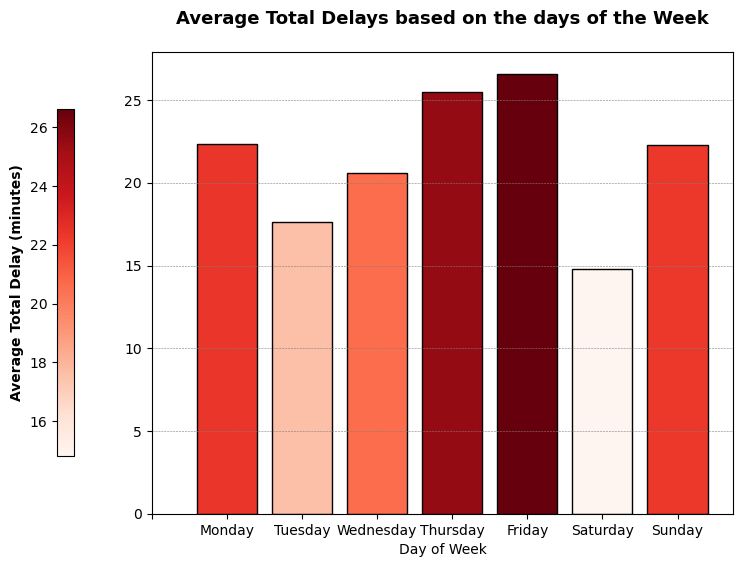

In [14]:
# A bar chart
plt.figure(figsize=(10, 6))

# Creating a suitable color scale to depend on the heights of the bars
min_delay = day_set_2007['TotDelay'].min()
max_delay = day_set_2007['TotDelay'].max()
norm = plt.Normalize(vmin=min_delay, vmax=max_delay)
color_scale = plt.cm.Reds(norm(day_set_2007['TotDelay']))

bars = plt.bar(day_set_2007['DayOfWeek'], day_set_2007['TotDelay'], color=color_scale, edgecolor='black')

sm = plt.cm.ScalarMappable(cmap='Reds', norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, label='Average Total Delay (minutes)', shrink=0.75, location='left')
cbar.ax.yaxis.label.set_fontweight('bold')

 # days of the week are to label
days = ['','Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
plt.xticks(ticks=range(len(days)), labels=days)

plt.grid(axis='y', linestyle='--', color='gray', linewidth=0.4)
plt.xlabel('Day of Week')
plt.title('Average Total Delays based on the days of the Week', size = 13, pad=20, fontweight='bold')

plt.show()

# BEST TIMES OF THE WEEK

In [15]:
# filtering the necessary columns 
filtered_set_v2 = data_2007[["Year", "DayOfWeek", "DepTime", "CRSDepTime", "ArrDelay", "DepDelay"]]
filtered_set_v2.head()

,Year,DayOfWeek,DepTime,CRSDepTime,ArrDelay,DepDelay
0,2007,1,1232.0,1225,1.0,7.0
1,2007,1,1918.0,1905,8.0,13.0
2,2007,1,2206.0,2130,34.0,36.0
3,2007,1,1230.0,1200,26.0,30.0
4,2007,1,831.0,830,-3.0,1.0


In [16]:
# removal of all records with missing values
filtered_set_v2 = filtered_set_v2.dropna()
filtered_set_v2.isnull().sum()

Year          0
DayOfWeek     0
DepTime       0
CRSDepTime    0
ArrDelay      0
DepDelay      0
dtype: int64

In [17]:
# converting the column to string format
filtered_set_v2.loc[:, 'CRSDepTime'] = filtered_set_v2['CRSDepTime'].astype(str).str.zfill(4)
# converting to HH:MM format
filtered_set_v2['CRSDepTime'] = filtered_set_v2['CRSDepTime'].str[:2] + ':' + filtered_set_v2['CRSDepTime'].str[2:]

In [18]:
filtered_set_v2['x axis'] = pd.to_datetime(filtered_set_v2['CRSDepTime'].astype('datetime64[ns]'))

C:\Users\User\AppData\Local\Temp\ipykernel_3312\3330619609.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  filtered_set_v2['x axis'] = pd.to_datetime(filtered_set_v2['CRSDepTime'].astype('datetime64[ns]'))


In [19]:
filtered_set_v2['x axis'] = filtered_set_v2['x axis'].dt.strftime('%H:%M')

In [20]:
filtered_set_v2['TotDelay'] = filtered_set_v2[['ArrDelay', 'DepDelay']].sum(axis=1)

In [21]:
filtered_set_v2.head()

,Year,DayOfWeek,DepTime,CRSDepTime,ArrDelay,DepDelay,x axis,TotDelay
0,2007,1,1232.0,12:25,1.0,7.0,12:25,8.0
1,2007,1,1918.0,19:05,8.0,13.0,19:05,21.0
2,2007,1,2206.0,21:30,34.0,36.0,21:30,70.0
3,2007,1,1230.0,12:00,26.0,30.0,12:00,56.0
4,2007,1,831.0,08:30,-3.0,1.0,08:30,-2.0


In [22]:
filtered_set_v2['DayOfWeek'].value_counts().sort_index()

DayOfWeek
1    1087778
2    1050354
3    1059849
4    1069801
5    1074709
6     915626
7    1017144
Name: count, dtype: int64

In [23]:
filtered_set_v2['TotDelay'] = filtered_set_v2[['ArrDelay', 'DepDelay']].sum(axis=1)
filtered_set_v2.head()

,Year,DayOfWeek,DepTime,CRSDepTime,ArrDelay,DepDelay,x axis,TotDelay
0,2007,1,1232.0,12:25,1.0,7.0,12:25,8.0
1,2007,1,1918.0,19:05,8.0,13.0,19:05,21.0
2,2007,1,2206.0,21:30,34.0,36.0,21:30,70.0
3,2007,1,1230.0,12:00,26.0,30.0,12:00,56.0
4,2007,1,831.0,08:30,-3.0,1.0,08:30,-2.0


In [24]:
# creating seperate data frames to extract the data by day 

# DayOfWeek : Monday ==> 1
Mon_2007_set = filtered_set_v2[filtered_set_v2['DayOfWeek'] == 1]
# DayOfWeek : Tuesday ==> 2
Tue_2007_set = filtered_set_v2[filtered_set_v2['DayOfWeek'] == 2]
# DayOfWeek : Wednesday ==> 3
Wed_2007_set = filtered_set_v2[filtered_set_v2['DayOfWeek'] == 3]
# DayOfWeek : Thursday ==> 4
Thu_2007_set = filtered_set_v2[filtered_set_v2['DayOfWeek'] == 4]
# DayOfWeek : Friday ==> 5
Fri_2007_set = filtered_set_v2[filtered_set_v2['DayOfWeek'] == 5]
# DayOfWeek : Saturday ==> 6
Sat_2007_set = filtered_set_v2[filtered_set_v2['DayOfWeek'] == 6]
# DayOfWeek : Sunday ==> 7
Sun_2007_set = filtered_set_v2[filtered_set_v2['DayOfWeek'] == 7]

In [25]:
# extracting the best times for the year to make coordinates for plotting
coordinates_2007 = pd.DataFrame()

In [26]:
Sun_2007_set['x axis'].dtypes

dtype('O')

In [27]:
# Example is shown above, the x axis rows are in object form hence must be converted to time format to group into intervals

In [28]:
# Define the interval size (e.g., 1 hour)
time_gap = '1H'

# 2007

Mon_2007_set['x axis'] = pd.to_datetime(Mon_2007_set['x axis'])
Tue_2007_set['x axis'] = pd.to_datetime(Tue_2007_set['x axis'])
Wed_2007_set['x axis'] = pd.to_datetime(Wed_2007_set['x axis'])
Thu_2007_set['x axis'] = pd.to_datetime(Thu_2007_set['x axis'])
Fri_2007_set['x axis'] = pd.to_datetime(Fri_2007_set['x axis'])
Sat_2007_set['x axis'] = pd.to_datetime(Sat_2007_set['x axis'])
Sun_2007_set['x axis'] = pd.to_datetime(Sun_2007_set['x axis'])

# Grouping data by intervals
coordinates_2007['median_delays_Mon_2007'] = Mon_2007_set.groupby(pd.Grouper(key='x axis', freq=time_gap))['TotDelay'].median()
coordinates_2007['median_delays_Tue_2007'] = Tue_2007_set.groupby(pd.Grouper(key='x axis', freq=time_gap))['TotDelay'].median()
coordinates_2007['median_delays_Wed_2007'] = Wed_2007_set.groupby(pd.Grouper(key='x axis', freq=time_gap))['TotDelay'].median()
coordinates_2007['median_delays_Thu_2007'] = Thu_2007_set.groupby(pd.Grouper(key='x axis', freq=time_gap))['TotDelay'].median()
coordinates_2007['median_delays_Fri_2007'] = Fri_2007_set.groupby(pd.Grouper(key='x axis', freq=time_gap))['TotDelay'].median()
coordinates_2007['median_delays_Sat_2007'] = Sat_2007_set.groupby(pd.Grouper(key='x axis', freq=time_gap))['TotDelay'].median()
coordinates_2007['median_delays_Sun_2007'] = Sun_2007_set.groupby(pd.Grouper(key='x axis', freq=time_gap))['TotDelay'].median()


C:\Users\User\AppData\Local\Temp\ipykernel_3312\1661769932.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  Mon_2007_set['x axis'] = pd.to_datetime(Mon_2007_set['x axis'])
C:\Users\User\AppData\Local\Temp\ipykernel_3312\1661769932.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Mon_2007_set['x axis'] = pd.to_datetime(Mon_2007_set['x axis'])
C:\Users\User\AppData\Local\Temp\ipykernel_3312\1661769932.py:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  Tue_2007_set['x

In [29]:
# Convert datetime objects to string labels of HH:MM format
coordinates_2007.reset_index(inplace=True)
coordinates_2007['x axis'] = coordinates_2007['x axis'].dt.strftime('%H:%M')
coordinates_2007.set_index('x axis', inplace=True)
coordinates_2007.head()

,median_delays_Mon_2007,median_delays_Tue_2007,median_delays_Wed_2007,median_delays_Thu_2007,median_delays_Fri_2007,median_delays_Sat_2007,median_delays_Sun_2007
x axis,,,,,,,
00:00,-3.0,-3.0,-6.0,-6.0,-2.0,-2.0,-6.0
01:00,-4.0,-6.0,-7.0,-7.0,-3.0,-4.0,-5.0
02:00,-3.0,-6.0,-4.0,-10.0,0.0,-3.0,-9.0
03:00,-15.0,-17.0,-13.5,-10.0,-22.0,-1.0,-15.5
04:00,-6.0,-7.0,-10.0,-8.0,-8.0,-3.0,-6.0


## Plotting a line chart for each day of the week

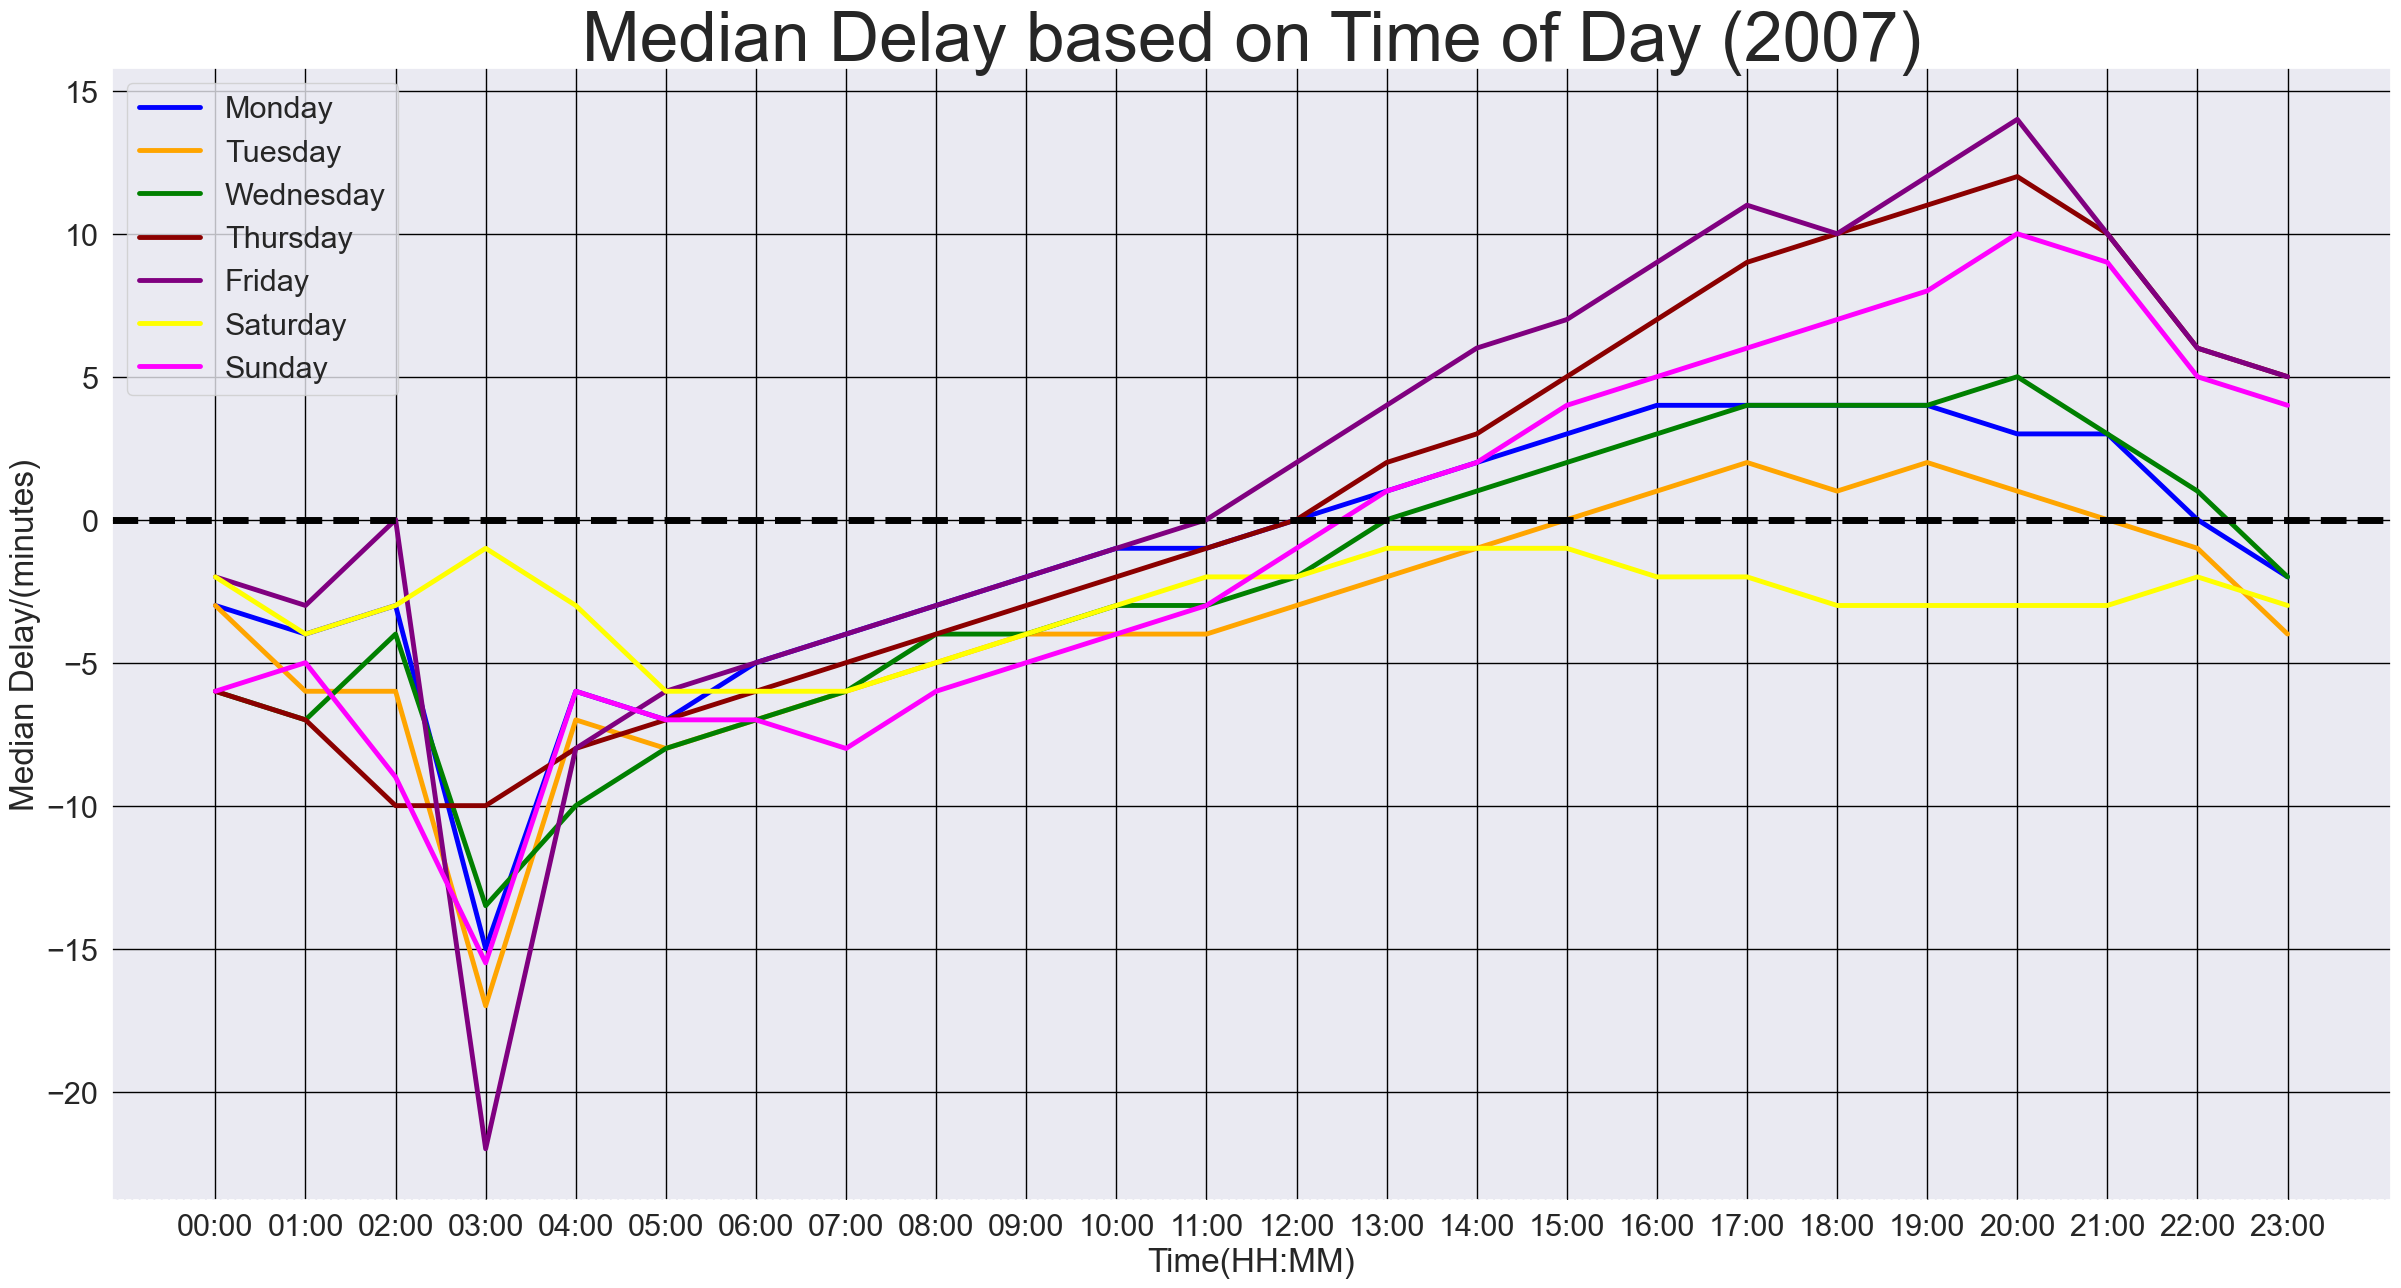

In [30]:
plt.figure(figsize = (100, 50))
sns.set(font_scale = 2)
ax = plt.subplot(331)

sns.lineplot(data=coordinates_2007['median_delays_Mon_2007'], label='Monday', linewidth = 3.5, color='blue')
sns.lineplot(data=coordinates_2007['median_delays_Tue_2007'], label='Tuesday', linewidth = 3.5, color='orange')
sns.lineplot(data=coordinates_2007['median_delays_Wed_2007'], label='Wednesday', linewidth = 3.5, color='green')
sns.lineplot(data=coordinates_2007['median_delays_Thu_2007'], label='Thursday', linewidth = 3.5, color='darkred')
sns.lineplot(data=coordinates_2007['median_delays_Fri_2007'], label='Friday', linewidth = 3.5, color='purple')
sns.lineplot(data=coordinates_2007['median_delays_Sat_2007'], label='Saturday', linewidth = 3.5, color='yellow')
sns.lineplot(data=coordinates_2007['median_delays_Sun_2007'], label='Sunday', linewidth = 3.5, color='magenta')

plt.title('Median Delay based on Time of Day (2007)', fontsize=50)
ax.set_xlabel('Time(HH:MM)')
plt.ylabel('Median Delay/(minutes)')
plt.legend(loc='upper left')

plt.axhline(y=0, color='black', linestyle='--', label='Threshold', linewidth=5)

ax.spines['bottom'].set_linewidth(2)
ax.spines['bottom'].set_linestyle('dotted')
     
plt.grid(color='black', linewidth=1)    
plt.show()

## Diagram to visualize the best times plotted after observing the line charts above

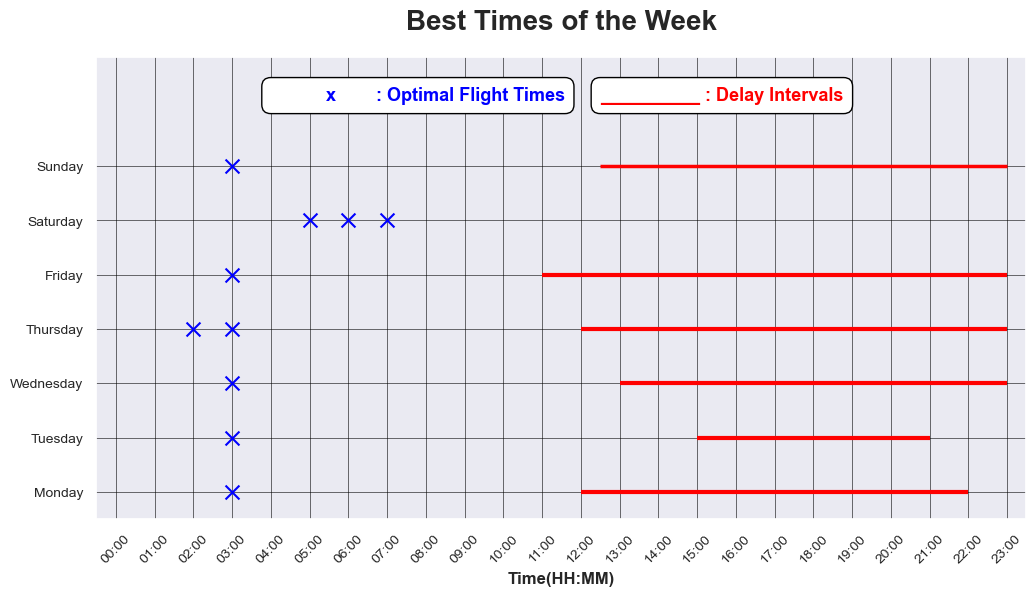

In [31]:
# Creating an empty grid 
plt.figure(figsize=(12, 6))

# Time for the x axis in HH:MM format
times_list = [f'{hour:02d}:00' for hour in range(24)]
plt.xlabel('Time(HH:MM)', fontsize=12, fontweight='bold')
plt.xticks(range(len(times_list)), times_list, rotation=45, fontsize = 10)

# labels for y axis
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
plt.yticks(range(len(days)), days, fontsize=10)

plt.title('Best Times of the Week', fontweight='bold', pad=20, fontsize=20)

# Adjusting the limits shown on the grid so that coordinates can be displayed clearly
plt.xlim(-0.5, len(times_list) - 0.5)
plt.ylim(-0.5, len(days) + 1)

# Marking the optimal times to fly for times of the week (MONDAY TO SUNDAY)
optimal_points = [(3,0), (3,1), (3,2), (2,3), (3,3), (3,4), (5,5), (6,5), (7,5), (3,6)] 

# Plotting crosses at the best times observed under each day
for point in optimal_points:
    plt.scatter(point[0], point[1], marker='x', color='blue', s=100)
   

# Red lines indicate the time intervals with DELAYS on average per day    
# MONDAY TO SUNDAY    

plt.hlines(y=0, xmin=12, xmax=22, color='red', linewidth=3)
plt.hlines(y=1, xmin=15, xmax=21, color='red', linewidth=3)
plt.hlines(y=2, xmin=13, xmax=23, color='red', linewidth=3)
plt.hlines(y=3, xmin=12, xmax=23, color='red', linewidth=3)
plt.hlines(y=4, xmin=11, xmax=23, color='red', linewidth=3)
# NO MEDIAN TOTAL DELAYS FOR SATURDAY
plt.hlines(y=6, xmin=12.5, xmax=23, color='red', linewidth=2.5)

details = {
    'Optimal Time': 'Optimal Flight Times',
    'Delays': 'Time Intervals with Delays'
}

plt.text(12.5, 7.2, '__________ : Delay Intervals', fontsize=13, fontweight='bold', color='red', bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))
plt.text(4, 7.2, '           x        : Optimal Flight Times', fontsize=13, fontweight='bold', color='blue', bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))

plt.grid(color='black', linewidth=0.4)
plt.show()